In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

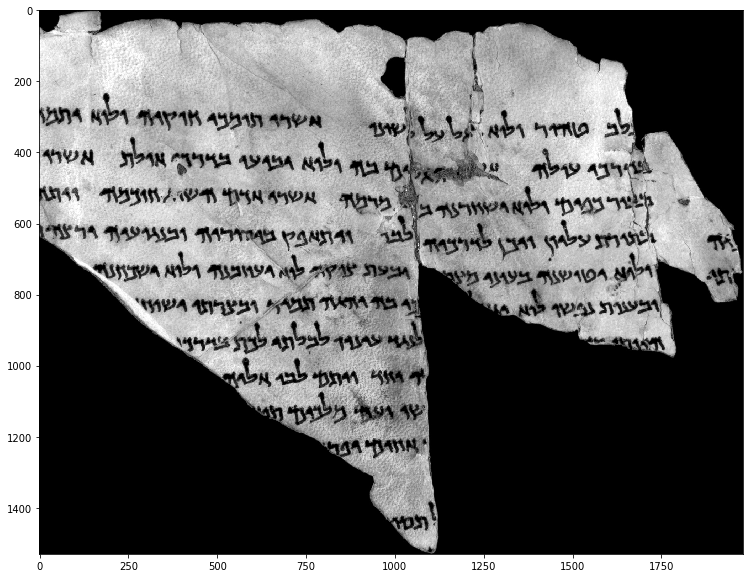

In [2]:
image = cv2.imread('image-output/test15_extracted.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()

In [3]:
_, image_bin = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [4]:
image_bin = 255 - image_bin
kernel = np.ones((5,5),np.uint8)
image_bin = cv2.morphologyEx(image_bin, cv2.MORPH_CLOSE, kernel)
image_bin = 255 - image_bin

#image_bin = cv2.medianBlur(image_bin, 3)


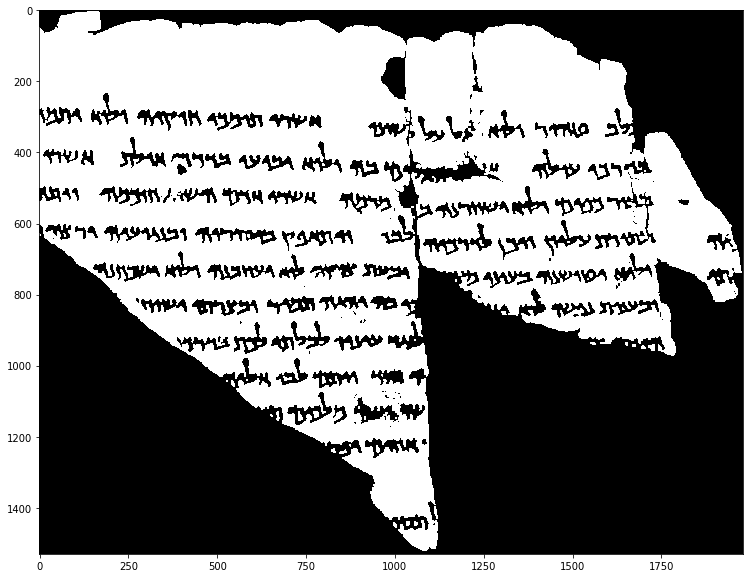

In [5]:
plt.figure(figsize = (500,10))
plt.imshow(image_bin, cmap='gray', aspect = 1)
plt.show()

In [6]:
image_bin = 255 - image_bin
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(image_bin, 8, cv2.CV_32S)
image_bin = 255 - image_bin
centroids

array([[  898.33823065,   539.35892586],
       [ 1097.55199265,  1006.72639517],
       [  165.5       ,    41.5       ],
       [  316.66666667,    48.        ],
       [ 1222.        ,   113.        ],
       [ 1227.57931034,   186.48571429],
       [ 1333.        ,   233.        ],
       [  193.90518784,   288.92093023],
       [ 1212.93877551,   242.67346939],
       [   58.83824039,   296.12192587],
       [  996.63698225,   331.22721893],
       [ 1212.81034483,   283.20689655],
       [  342.4730806 ,   300.49283211],
       [ 1243.01136364,   284.76136364],
       [  435.13091309,   301.31243124],
       [ 1058.        ,   281.        ],
       [ 1308.94069128,   331.53652789],
       [  553.61706349,   309.09240363],
       [  699.77620397,   308.85977337],
       [  777.23196448,   312.87680355],
       [ 1052.66666667,   297.33333333],
       [ 1098.26703499,   339.56537753],
       [ 1165.18097208,   333.25439504],
       [ 1056.        ,   307.        ],
       [ 1242.  

In [7]:
n_labels

220

In [8]:
stats

array([[      0,       4,    1975,    1518, 1418396],
       [      0,       0,    1979,    1530, 1410834],
       [    164,      41,       4,       2,       6],
       ..., 
       [   1053,    1253,       3,       2,       5],
       [   1108,    1442,       6,       7,      24],
       [   1080,    1515,       3,       2,       3]], dtype=int32)

In [9]:
min_thresh = 400
max_thresh = 3000
boxes = []
box_centroids = []
for i in range(len(stats)):
    if(stats[i][4] >= min_thresh and stats[i][4] <= max_thresh):
        x = stats[i][0]
        y = stats[i][1]
        width = stats[i][2]
        height = stats[i][3]
        boxes.append(stats[i])
        box_centroids.append(centroids[i])
        cv2.rectangle(image,(x,y),(x + width,y + height),(0,200,0),3)

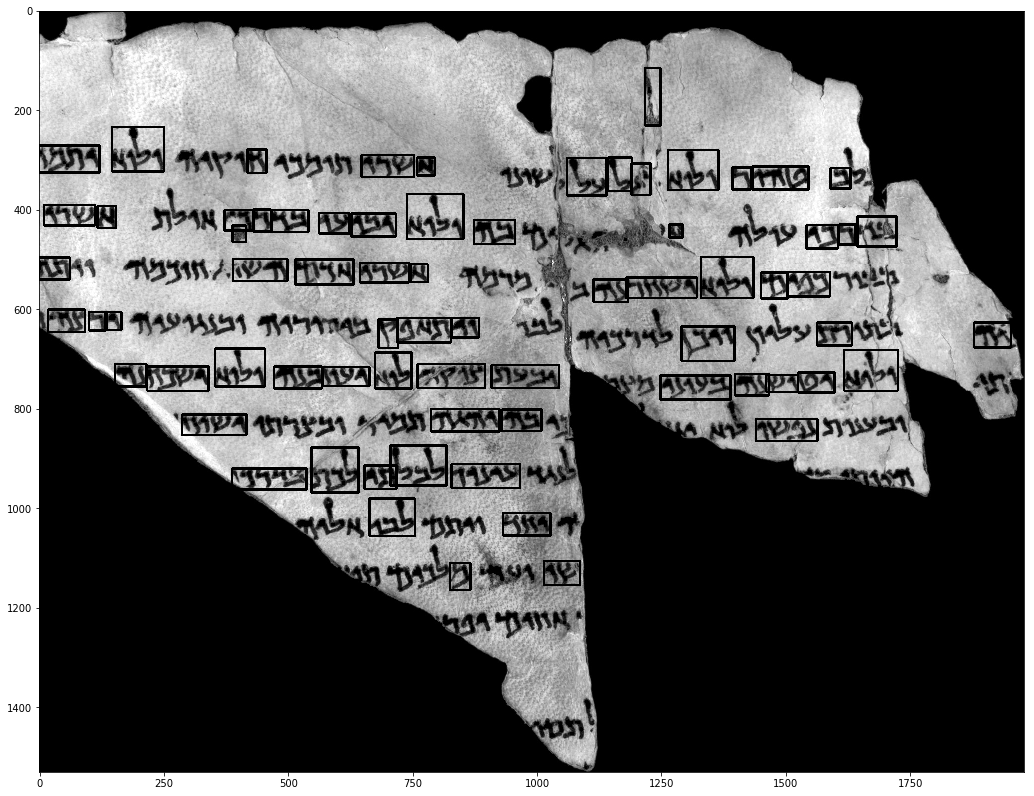

In [10]:
final_image = np.copy(image)
plt.figure(figsize = (500,14))
plt.imshow(final_image, cmap='gray', aspect = 1)
plt.show()

In [11]:
avg_width = 0
avg_height = 0
N = len(boxes)

In [12]:
for box in boxes:
    avg_width += box[2]
    avg_height += box[3]
avg_width /= N
avg_height /= N
avg_height *= 1.5    

In [13]:
avg_width

81.236111111111114

In [14]:
avg_height

103.72222222222223

In [15]:
word_lines = []
line = []
# add first box to first line
line.append(boxes[0])
previous_centroid = box_centroids[0][1]
boxes.pop(0)
for i in range(len(boxes)):
    box = boxes[i]
    #check if box belongs to the same line as the previous one: check if centroid of box falls within the range of the previous
    #box
    centroid_y = box_centroids[i][1]
    if(centroid_y >= (previous_centroid - avg_height) and (centroid_y <= previous_centroid + avg_height)):
        line.append(box)
        previous_centroid = centroid_y
    else:
        #if not, add the line to the collection of lines and start a new one
        word_lines.append(line)
        line = []
    
    
    

In [16]:
image = cv2.imread('image-output/test15_extracted.jpg', cv2.IMREAD_GRAYSCALE)
width, height = image.shape
print(word_lines)

[]


In [17]:
min_height = 99999
max_height = 0

In [18]:
# draw lines for the first strip
for box in word_lines[0]:
    if(box[1] < min_height):
        min_height = box[1]
    elif(box[1] + box[3]  > max_height):
        max_height = box[1] + box[3] 

        
cv2.line(image,(0,min_height),(width, min_height),(0,200,0),3)    
cv2.line(image,(0,max_height),(width, max_height),(0,200,0),3) 
print(min_height)
print(max_height)

IndexError: list index out of range

In [ ]:
plt.figure(figsize = (500,10))
plt.imshow(image, cmap='gray', aspect = 1)
plt.show()